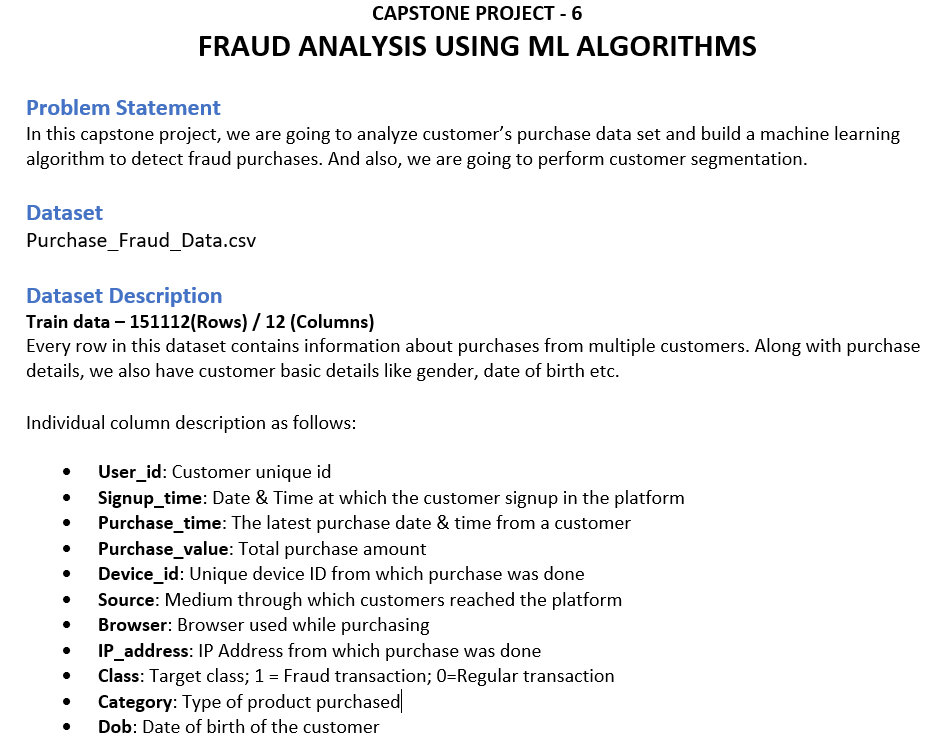

# **1. Installing & Importing Libraries**

### **Installing Libraries**

In [1]:
# !pip install -q datascience                      # Package that is required by pandas profiling                        
# !pip install -q pandas-profiling                 # Library to generate basic statistics about data  

# All the above mentioned insatllations and updates are done based on the requirement as per the data.

In [260]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import re                                                           # Importing package re (For Regular Expression)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
%matplotlib inline
import seaborn as sns                                               # Importing seaborn library for interactive visualization
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations

#-------------------------------------------------------------------------------------------------------------------------------

from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)

#-------------------------------------------------------------------------------------------------------------------------------
#Import from sklearn:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve
from xgboost import XGBClassifier


# Above mentioned modules are imported.

# **2. Data Acquisition & Description**

In [3]:
df=pd.read_csv('Purchase_Fraud_Data.csv')

#### Reading first five rows from the data source: 

In [4]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,24-02-2015 22:55,18-04-2015 02:47,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-02-1976
1,333320,07-06-2015 20:39,08-06-2015 01:38,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,02-01-1962
2,1359,01-01-2015 18:52,01-01-2015 18:52,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,05-03-1962
3,150084,28-04-2015 21:13,04-05-2015 13:54,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,03-07-1974
4,221365,21-07-2015 07:09,09-09-2015 18:40,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-08-1970


#### Shape of the data:

In [5]:
print('No. of rows/records in the data:', df.shape[0])
print('No. of columns in the data:', df.shape[1])

No. of rows/records in the data: 151112
No. of columns in the data: 12


# **3. Data Pre-Profiling**

In [6]:
profile=ProfileReport(df,minimal=True)
profile.to_notebook_iframe()
# profile.to_file('EPL_PreProfilingReport.html')
print('Pre-Profiling accomplished.')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling accomplished.


#### Data info:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             146185 non-null  object 
 8   ip_address      151112 non-null  float64
 9   class           151112 non-null  int64  
 10  category        151112 non-null  object 
 11  dob             146188 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.8+ MB


In [8]:
# Statistical description of numerical fields:
df.describe()

,user_id,purchase_value,ip_address,class
count,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,50521.469003,2.152145e+09,0.093646
std,115369.285024,28533.667117,1.248497e+09,0.291336
min,2.000000,1016.000000,5.209350e+04,0.000000
25%,100642.500000,25919.000000,1.085934e+09,0.000000
50%,199958.000000,50484.000000,2.154770e+09,0.000000
75%,300054.000000,75296.250000,3.243258e+09,0.000000
max,400000.000000,100092.000000,4.294850e+09,1.000000


In [9]:
# Statistical description of categorical fields:
df.describe(include='object')

,signup_time,purchase_time,device_id,source,browser,sex,category,dob
count,151112,151112,151112,151112,151112,146185,151112,146188
unique,135572,123446,137956,3,5,2,5,13745
top,06-01-2015 12:10,06-01-2015 12:10,EQYVNEGOFLAWK,SEO,Chrome,M,electronics,24-07-1982
freq,29,21,20,60615,61432,85445,32056,37


### Data Cleaning:

In [10]:
# Converting the 'user_id' col to string type:
df['user_id']=df['user_id'].astype(str)
df['user_id']

0          22058
1         333320
2           1359
3         150084
4         221365
           ...  
151107    345170
151108    274471
151109    368416
151110    207709
151111    138208
Name: user_id, Length: 151112, dtype: object

In [11]:
# Converting the 'ip_address' col to string type:
df['ip_address']=df['ip_address'].astype(str)
df['ip_address']

0          732758368.8
1          350311387.9
2         2621473820.0
3         3840542444.0
4          415583117.5
              ...     
151107    3451154527.0
151108    2439047221.0
151109    2748470524.0
151110    3601174708.0
151111    4103824511.0
Name: ip_address, Length: 151112, dtype: object

In [12]:
# Creating a copy of the master dataframe to be used for further analysis:
df_master=df.copy()

In [13]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,24-02-2015 22:55,18-04-2015 02:47,65278,QVPSPJUOCKZAR,SEO,Chrome,M,732758368.8,0,home_essentials,22-02-1976
1,333320,07-06-2015 20:39,08-06-2015 01:38,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,350311387.9,0,apparels,02-01-1962
2,1359,01-01-2015 18:52,01-01-2015 18:52,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2621473820.0,1,electronics,05-03-1962
3,150084,28-04-2015 21:13,04-05-2015 13:54,43650,ATGTXKYKUDUQN,SEO,Safari,M,3840542444.0,0,health_care,03-07-1974
4,221365,21-07-2015 07:09,09-09-2015 18:40,45016,NAUITBZFJKHWW,Ads,Safari,M,415583117.5,0,home_essentials,25-08-1970


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         151112 non-null  object
 1   signup_time     151112 non-null  object
 2   purchase_time   151112 non-null  object
 3   purchase_value  151112 non-null  int64 
 4   device_id       151112 non-null  object
 5   source          151112 non-null  object
 6   browser         151112 non-null  object
 7   sex             146185 non-null  object
 8   ip_address      151112 non-null  object
 9   class           151112 non-null  int64 
 10  category        151112 non-null  object
 11  dob             146188 non-null  object
dtypes: int64(2), object(10)
memory usage: 13.8+ MB


In [15]:
# Removing all null data:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141404 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         141404 non-null  object
 1   signup_time     141404 non-null  object
 2   purchase_time   141404 non-null  object
 3   purchase_value  141404 non-null  int64 
 4   device_id       141404 non-null  object
 5   source          141404 non-null  object
 6   browser         141404 non-null  object
 7   sex             141404 non-null  object
 8   ip_address      141404 non-null  object
 9   class           141404 non-null  int64 
 10  category        141404 non-null  object
 11  dob             141404 non-null  object
dtypes: int64(2), object(10)
memory usage: 14.0+ MB


In [17]:
profile=ProfileReport(df,minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Note: From the above profiling data, looking at the 'user_id' col, it can be determined that the same id is not used multiple times.  
- So, user_id is not vital based on this data analysis. So, dropping the col is required.

In [18]:
# dropping user_id as it is unique and has low correlation value:
df.drop(labels='user_id',axis=1,inplace=True)
df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,24-02-2015 22:55,18-04-2015 02:47,65278,QVPSPJUOCKZAR,SEO,Chrome,M,732758368.8,0,home_essentials,22-02-1976
1,07-06-2015 20:39,08-06-2015 01:38,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,350311387.9,0,apparels,02-01-1962
2,01-01-2015 18:52,01-01-2015 18:52,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2621473820.0,1,electronics,05-03-1962
3,28-04-2015 21:13,04-05-2015 13:54,43650,ATGTXKYKUDUQN,SEO,Safari,M,3840542444.0,0,health_care,03-07-1974
4,21-07-2015 07:09,09-09-2015 18:40,45016,NAUITBZFJKHWW,Ads,Safari,M,415583117.5,0,home_essentials,25-08-1970


In [19]:
# Converting the purchase_time col to datetime type:
df['purchase_time']=pd.to_datetime(df['purchase_time'])

In [20]:
# Converting the DOB col to datetime type:
df['dob']=pd.to_datetime(df['dob'])

In [21]:
# Extracting the year from both purchase_time col to derive the calculated field age:
df['purchase_year']=df['purchase_time'].dt.year

In [22]:
# Extracting the year from both DOB col to derive the calculated field age:
df['dob_year']=df['dob'].dt.year

In [23]:
df['age']=df['purchase_year']-df['dob_year']

In [24]:
df.purchase_year.unique()     # this data is only limited to a single year(or period)

array([2015], dtype=int64)

In [25]:
# df.drop(columns=['purchase_year','dob_year'],inplace=True)

In [26]:
# Converting signup time to timestamp:
df['signup_time']=pd.to_datetime(df['signup_time'])

In [27]:
df['signup_month']=df['signup_time'].dt.month
df['signup_day']=df['signup_time'].dt.day
df['signup_week']=df['signup_time'].dt.dayofweek
df['signup_hour']=df['signup_time'].dt.hour

In [28]:
df['signup_dayoftheweek']=df['signup_week']

In [29]:
df.drop(labels='signup_week',axis=1,inplace=True)

In [30]:
df['purchase_month']=df['purchase_time'].dt.month
df['purchase_day']=df['purchase_time'].dt.day
df['purchase_dayoftheweek']=df['purchase_time'].dt.dayofweek
df['purchase_hour']=df['purchase_time'].dt.hour

In [31]:
df.drop(labels='dob',axis=1,inplace=True)

In [32]:
# dropping device_id, ip_address based on corelation value:
df.drop(labels=['device_id','ip_address'],axis=1,inplace=True)

In [33]:
df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,signup_month,signup_day,signup_hour,signup_dayoftheweek,purchase_month,purchase_day,purchase_dayoftheweek,purchase_hour
0,2015-02-24 22:55:00,2015-04-18 02:47:00,65278,SEO,Chrome,M,0,home_essentials,2015,1976,39,2,24,22,1,4,18,5,2
1,2015-07-06 20:39:00,2015-08-06 01:38:00,96399,Ads,Chrome,F,0,apparels,2015,1962,53,7,6,20,0,8,6,3,1
2,2015-01-01 18:52:00,2015-01-01 18:52:00,57296,SEO,Opera,M,1,electronics,2015,1962,53,1,1,18,3,1,1,3,18
3,2015-04-28 21:13:00,2015-04-05 13:54:00,43650,SEO,Safari,M,0,health_care,2015,1974,41,4,28,21,1,4,5,6,13
4,2015-07-21 07:09:00,2015-09-09 18:40:00,45016,Ads,Safari,M,0,home_essentials,2015,1970,45,7,21,7,1,9,9,2,18


In [34]:
df_master=df.copy()

In [35]:
# The proportion of the data containing class 1 & 0:
figure = plt.figure(figsize=[7,5])
sns.countplot(x='class', data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

In [36]:
# Filtering all the fraud data in a seperate dataframe for EDA:
df_fraud=pd.DataFrame()

In [37]:
df_fraud=df[df['class']==1]

In [38]:
df_fraud.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,signup_month,signup_day,signup_hour,signup_dayoftheweek,purchase_month,purchase_day,purchase_dayoftheweek,purchase_hour
2,2015-01-01 18:52:00,2015-01-01 18:52:00,57296,SEO,Opera,M,1,electronics,2015,1962,53,1,1,18,3,1,1,3,18
25,2015-04-01 22:32:00,2015-01-16 01:13:00,16105,SEO,FireFox,M,1,health_care,2015,1979,36,4,1,22,2,1,16,4,1
29,2015-07-01 03:44:00,2015-07-01 03:44:00,49266,SEO,Chrome,F,1,apparels,2015,1988,27,7,1,3,2,7,1,2,3
59,2015-01-02 05:59:00,2015-02-20 08:09:00,35831,SEO,IE,M,1,health_care,2015,1985,30,1,2,5,4,2,20,4,8
63,2015-05-01 21:07:00,2015-03-15 00:43:00,62155,Ads,IE,M,1,health_care,2015,1980,35,5,1,21,4,3,15,6,0


In [39]:
df_fraud['signup_day_char'] = pd.to_datetime(df_fraud['signup_time']).dt.day_name()
df_fraud['purchase_day_char'] = pd.to_datetime(df_fraud['purchase_time']).dt.day_name()
df_fraud['purchase_month'] = pd.to_datetime(df_fraud['purchase_time']).dt.month_name()

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [40]:
df.drop(labels='purchase_time',axis=1,inplace=True)
df.drop(labels='signup_time',axis=1,inplace=True)
df_fraud.drop(labels='purchase_time',axis=1,inplace=True)
df_fraud.drop(labels='signup_time',axis=1,inplace=True)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
df_fraud.drop(labels=['signup_day','purchase_day'],axis=1,inplace=True)

In [42]:
df_fraud.head()

,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,signup_month,signup_hour,signup_dayoftheweek,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
2,57296,SEO,Opera,M,1,electronics,2015,1962,53,1,18,3,January,3,18,Thursday,Thursday
25,16105,SEO,FireFox,M,1,health_care,2015,1979,36,4,22,2,January,4,1,Wednesday,Friday
29,49266,SEO,Chrome,F,1,apparels,2015,1988,27,7,3,2,July,2,3,Wednesday,Wednesday
59,35831,SEO,IE,M,1,health_care,2015,1985,30,1,5,4,February,4,8,Friday,Friday
63,62155,Ads,IE,M,1,health_care,2015,1980,35,5,21,4,March,6,0,Friday,Sunday


Text(0.5, 1.0, '% of Fraud Transactions done based on different categories')

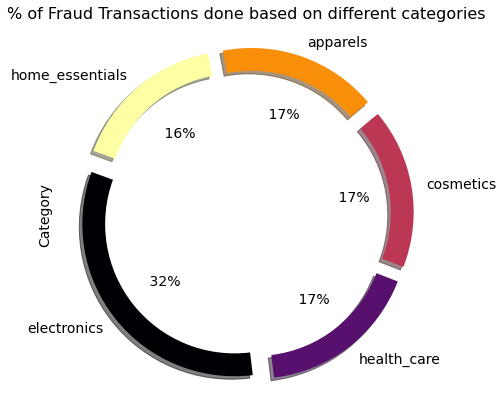

In [261]:
# Category based distribution for all fraud cases:
space = np.ones(5)/10

df_fraud.category.value_counts().plot(kind='pie',figsize=(15,7),autopct='%3.0f%%',wedgeprops=dict(width=0.15),fontsize=14,explode=space,shadow=True, startangle=160, cmap='inferno')
plt.ylabel(ylabel='Category', size=14)
plt.title(label='% of Fraud Transactions done based on different categories', size=16)

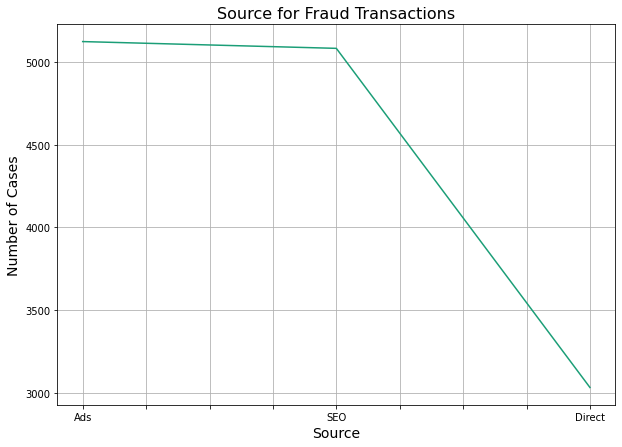

In [262]:
# The source of most of the fraud cases are 'Ads' & 'SEO':
figure = plt.figure(figsize=[10, 7])
df_fraud.source.value_counts().plot.line(color='#1B9E77')
plt.xlabel(xlabel='Source', size=14)
plt.ylabel(ylabel='Number of Cases', size=14)
plt.title(label='Source for Fraud Transactions', size=16)
plt.grid()

Text(0.5, 1.0, '% of browsers used for Fraud Transactions')

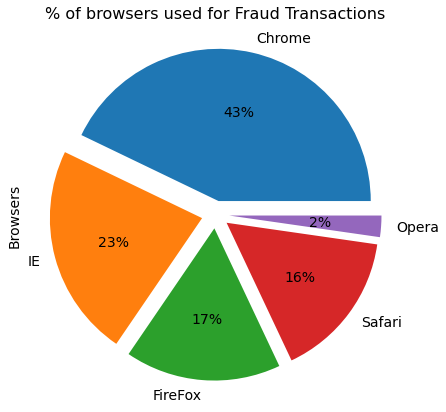

In [263]:
# The browser used in most of the fraud cases is 'Google Chrome':
space = np.ones(5)/11

df_fraud.browser.value_counts().plot.pie(figsize=(15,7),autopct=lambda p:f'{p:.0f}%',fontsize=14,explode=space)
plt.ylabel(ylabel='Browsers', size=14)
plt.title(label='% of browsers used for Fraud Transactions', size=16)

Text(0.5, 1.0, '% of Male & Female involved in Fraud Transactions')

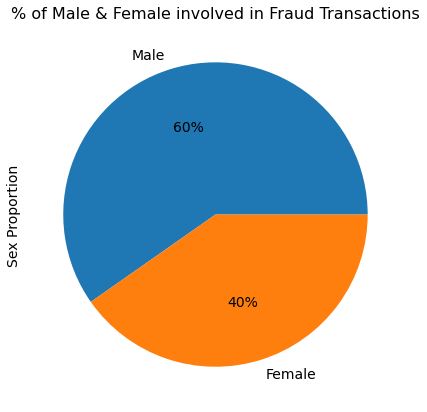

In [264]:
# Most pf the percentage of fruadsters are Male:
df_fraud.sex.value_counts().plot.pie(figsize=(15,7),autopct=lambda p:f'{p:.0f}%', labels=['Male','Female'],fontsize=14)
plt.ylabel(ylabel='Sex Proportion', size=14)
plt.title(label='% of Male & Female involved in Fraud Transactions', size=16)

In [47]:
# Total purchase value in all Fraud Cases:
total_purchase_value_fraud=sum(df_fraud.purchase_value)
total_purchase_value_fraud

# six hundred seventy-two million nine hundred ninety-two thousand seven hundred eighty-two

672992782

In [48]:
# The categories targeted mostly are (not that other categories will not be targerted):
df_fraud.category.unique()

array(['electronics', 'health_care', 'apparels', 'home_essentials',
       'cosmetics'], dtype=object)

In [49]:
# Value of fraud transactions based on Category:
df_fraud.groupby('category')['purchase_value'].sum().sort_values(ascending=False)

category
electronics        219816997
health_care        114941791
apparels           114745689
cosmetics          112388933
home_essentials    111099372
Name: purchase_value, dtype: int64

In [50]:
# The age of the fraudsters lie between 18-69:
min(df_fraud.age),max(df_fraud.age)

(18, 69)

In [51]:
df_fraud.drop(columns=['signup_month','signup_hour','signup_dayoftheweek'],inplace=True)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


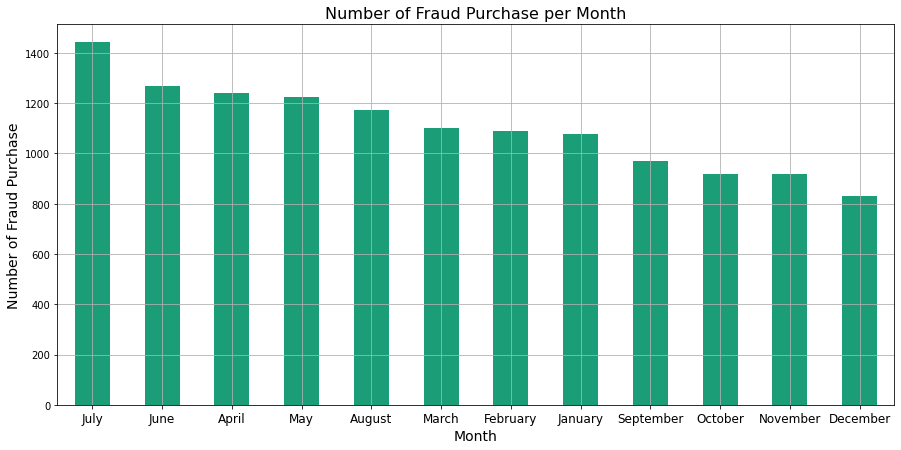

In [265]:
# The highest number of Fraud cases have occured in the First 8 months:
figure = plt.figure(figsize=[15, 7])
df_fraud.purchase_month.value_counts().sort_values(ascending=False).plot.bar(color='#1B9E77')
plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel='Month', size=14)
plt.ylabel(ylabel='Number of Fraud Purchase', size=14)
plt.title(label='Number of Fraud Purchase per Month', size=16)
plt.grid()

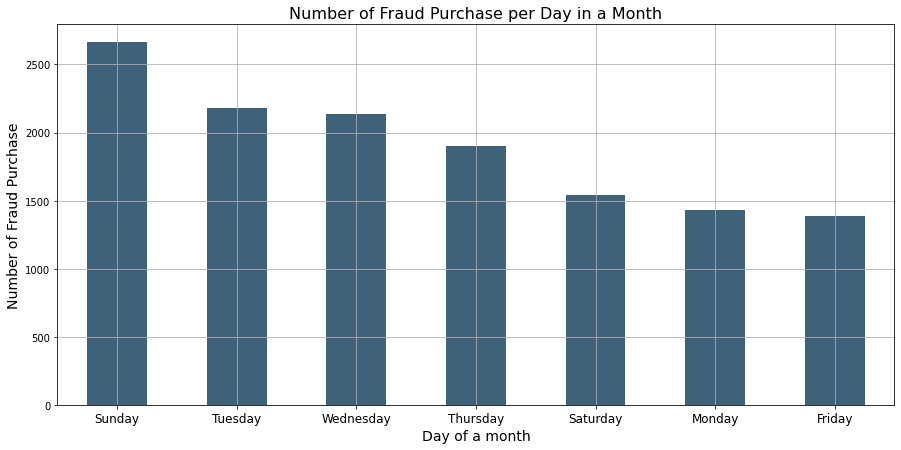

In [266]:
# The highest number of Fraud Purchases have been done on the First of every month:
figure = plt.figure(figsize=[15, 7])
df_fraud.purchase_day_char.value_counts().sort_values(ascending=False).plot.bar(color='#3F617A')
plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel='Day of a month', size=14)
plt.ylabel(ylabel='Number of Fraud Purchase', size=14)
plt.title(label='Number of Fraud Purchase per Day in a Month', size=16)
plt.grid()

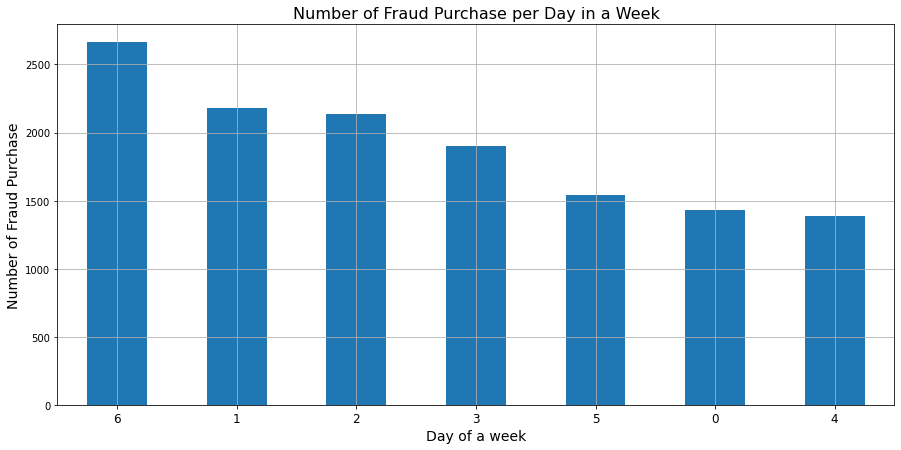

In [267]:
# The highest number of Fraud Purchases have been done on the Last day of every week:
figure = plt.figure(figsize=[15, 7])
df_fraud.purchase_dayoftheweek.value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel='Day of a week', size=14)
plt.ylabel(ylabel='Number of Fraud Purchase', size=14)
plt.title(label='Number of Fraud Purchase per Day in a Week', size=16)
plt.grid()

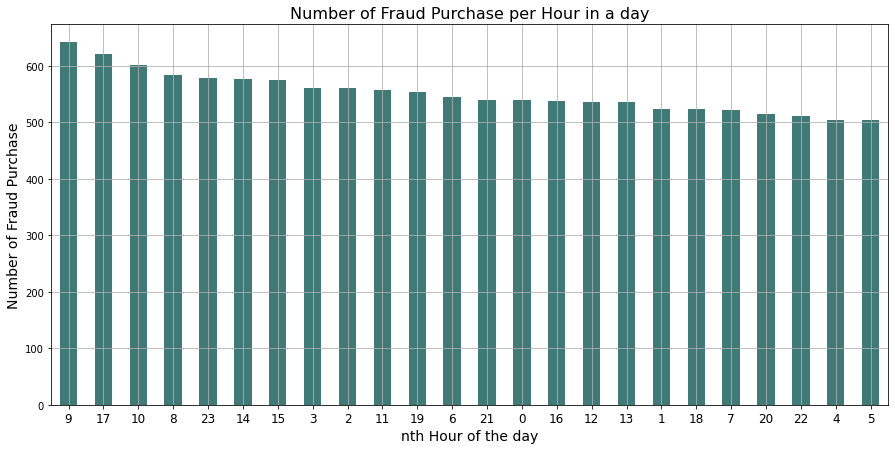

In [268]:
# The highest number of Fraud Purchases have been done on the Last day of every week:
figure = plt.figure(figsize=[15, 7])
df_fraud.purchase_hour.value_counts().sort_values(ascending=False).plot.bar(color='#3f7a76')
plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel='nth Hour of the day', size=14)
plt.ylabel(ylabel='Number of Fraud Purchase', size=14)
plt.title(label='Number of Fraud Purchase per Hour in a day', size=16)
plt.grid()

In [56]:
df_fraud.groupby('category').mean().sort_values('purchase_value',ascending=False)

,purchase_value,class,purchase_year,dob_year,age,purchase_dayoftheweek,purchase_hour
category,,,,,,,
apparels,51363.334378,1.0,2015.0,1975.301253,39.698747,3.108774,11.405998
electronics,51132.123052,1.0,2015.0,1970.419632,44.580368,3.108630,11.603164
home_essentials,51080.171034,1.0,2015.0,1975.219310,39.780690,3.108046,11.465747
health_care,50435.186924,1.0,2015.0,1975.705134,39.294866,3.191312,11.572181
cosmetics,49884.124723,1.0,2015.0,1975.450954,39.549046,3.130493,11.541056


- 1. Apparels & Electronics is the most effected category with an minimum average fraud purchase of 51000
- 2. Avg age in all the fraud cases is 39
- 3. Most of the Fraud purchases are done on 11th hour

In [57]:
df_fraud_electronics=df_fraud[df_fraud['category']=='electronics']
df_fraud_electronics.head()

,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
2,57296,SEO,Opera,M,1,electronics,2015,1962,53,January,3,18,Thursday,Thursday
83,53656,Ads,Safari,M,1,electronics,2015,1965,50,November,6,6,Thursday,Sunday
93,83781,Ads,Chrome,F,1,electronics,2015,1989,26,March,3,21,Friday,Thursday
132,6382,SEO,Chrome,M,1,electronics,2015,1965,50,March,3,14,Thursday,Thursday
133,57151,SEO,Chrome,M,1,electronics,2015,1984,31,December,3,4,Thursday,Thursday


In [58]:
# Min & Max value of fraud purchase in Electronics Category:
min(df_fraud_electronics.purchase_value),max(df_fraud_electronics.purchase_value),round(df_fraud_electronics.purchase_value.mean(),0)

(1119, 100037, 51132.0)

In [59]:
# Most of the fraud purchase source is SEO for electronics category:
df_fraud_electronics.source.value_counts()

SEO       1668
Ads       1636
Direct     995
Name: source, dtype: int64

In [60]:
df_fraud_electronics.browser.value_counts()

Chrome     1809
IE          959
FireFox     727
Safari      719
Opera        85
Name: browser, dtype: int64

In [61]:
round(df_fraud_electronics.sex.value_counts(normalize=True)*100,0)

M    60.0
F    40.0
Name: sex, dtype: float64

In [62]:
# The avg age of the people are 45 related to fraud purchase of electronic goods: 
round(df_fraud_electronics.age.mean(),0)

45.0

In [63]:
# Most of the fraud purchases on electronic goods are done in the month of June & July:
df_fraud_electronics.purchase_month.value_counts()

June         428
July         428
April        404
May          396
August       385
February     366
March        358
January      356
November     309
October      305
September    282
December     282
Name: purchase_month, dtype: int64

In [64]:
df_fraud_apparels=df_fraud[df_fraud['category']=='apparels']
df_fraud_apparels.head()

,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
29,49266,SEO,Chrome,F,1,apparels,2015,1988,27,July,2,3,Wednesday,Wednesday
141,78075,SEO,Safari,M,1,apparels,2015,1988,27,October,3,17,Thursday,Thursday
190,82630,Ads,FireFox,M,1,apparels,2015,1955,60,August,5,21,Saturday,Saturday
249,90432,Direct,IE,M,1,apparels,2015,1997,18,September,0,6,Tuesday,Monday
291,33094,SEO,IE,M,1,apparels,2015,1963,52,July,2,12,Wednesday,Wednesday


In [65]:
# Min & Max value of fraud purchase in apparels Category:
min(df_fraud_apparels.purchase_value),max(df_fraud_apparels.purchase_value),round(df_fraud_apparels.purchase_value.mean(),0)

(1068, 100022, 51363.0)

In [66]:
# Most of the fraud purchase source is Ads for apparels category:
df_fraud_apparels.source.value_counts()

Ads       864
SEO       851
Direct    519
Name: source, dtype: int64

In [67]:
df_fraud_apparels.browser.value_counts()

Chrome     986
IE         498
FireFox    355
Safari     347
Opera       48
Name: browser, dtype: int64

In [68]:
round(df_fraud_apparels.sex.value_counts(normalize=True)*100,0)

M    60.0
F    40.0
Name: sex, dtype: float64

In [69]:
# The avg age of the people are 40 related to fraud purchase of apparels goods: 
round(df_fraud_apparels.age.mean(),0)

40.0

In [70]:
# Most of the fraud purchases on electronic goods are done in the month of April,May,June,July:
df_fraud_apparels.purchase_month.value_counts()

July         231
April        225
June         220
May          216
March        203
August       196
January      180
September    179
November     167
October      140
December     139
February     138
Name: purchase_month, dtype: int64

In [71]:
df_fraud_home_essentials=df_fraud[df_fraud['category']=='home_essentials']
df_fraud_home_essentials.head()

,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
64,43898,Ads,FireFox,M,1,home_essentials,2015,1979,36,July,2,17,Wednesday,Wednesday
77,59759,SEO,Opera,F,1,home_essentials,2015,1957,58,July,2,11,Wednesday,Wednesday
160,86580,Direct,Safari,M,1,home_essentials,2015,1949,66,June,0,17,Monday,Monday
205,72537,SEO,Safari,M,1,home_essentials,2015,1994,21,April,2,17,Saturday,Wednesday
207,30710,SEO,Chrome,M,1,home_essentials,2015,1977,38,April,2,4,Wednesday,Wednesday


In [72]:
# Min & Max value of fraud purchase in home_essentials Category:
min(df_fraud_home_essentials.purchase_value),max(df_fraud_home_essentials.purchase_value),round(df_fraud_home_essentials.purchase_value.mean(),0)

(1076, 99952, 51080.0)

In [73]:
# Most of the fraud purchase source is Ads for home_essentials category:
df_fraud_home_essentials.source.value_counts()

Ads       860
SEO       841
Direct    474
Name: source, dtype: int64

In [74]:
df_fraud_home_essentials.browser.value_counts()

Chrome     958
IE         476
FireFox    356
Safari     332
Opera       53
Name: browser, dtype: int64

In [75]:
round(df_fraud_home_essentials.sex.value_counts(normalize=True)*100,0)

M    60.0
F    40.0
Name: sex, dtype: float64

In [76]:
# The avg age of the people are 40 related to fraud purchase of home_essentials goods: 
round(df_fraud_home_essentials.age.mean(),0)

40.0

In [77]:
df_fraud_home_essentials.purchase_month.value_counts()

July         241
February     207
April        199
May          194
August       192
June         188
January      173
September    168
March        167
October      156
December     146
November     144
Name: purchase_month, dtype: int64

In [78]:
df_fraud_health_care=df_fraud[df_fraud['category']=='health_care']
df_fraud_health_care.head()

,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
25,16105,SEO,FireFox,M,1,health_care,2015,1979,36,January,4,1,Wednesday,Friday
59,35831,SEO,IE,M,1,health_care,2015,1985,30,February,4,8,Friday,Friday
63,62155,Ads,IE,M,1,health_care,2015,1980,35,March,6,0,Friday,Sunday
222,37264,Direct,Chrome,M,1,health_care,2015,1988,27,November,6,5,Sunday,Sunday
235,46353,Ads,Chrome,F,1,health_care,2015,1989,26,April,2,2,Wednesday,Wednesday


In [79]:
# Min & Max value of fraud purchase in health_care Category:
min(df_fraud_health_care.purchase_value),max(df_fraud_health_care.purchase_value),round(df_fraud_health_care.purchase_value.mean(),0)

(1053, 100041, 50435.0)

In [80]:
# Most of the fraud purchase source is Ads for home_essentials category:
df_fraud_health_care.source.value_counts()

Ads       893
SEO       840
Direct    546
Name: source, dtype: int64

In [81]:
df_fraud_health_care.browser.value_counts()

Chrome     981
IE         519
FireFox    396
Safari     319
Opera       64
Name: browser, dtype: int64

In [82]:
# The avg age of the people are 40 related to fraud purchase of health_care goods: 
round(df_fraud_health_care.age.mean(),0)

39.0

In [83]:
round(df_fraud_health_care.sex.value_counts(normalize=True)*100,0)

M    61.0
F    39.0
Name: sex, dtype: float64

In [84]:
df_fraud_cosmetics=df_fraud[df_fraud['category']=='cosmetics']
df_fraud_cosmetics.head()

,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
111,78572,Ads,IE,F,1,cosmetics,2015,1993,22,June,0,21,Monday,Monday
162,12396,Ads,Safari,M,1,cosmetics,2015,1957,58,October,1,13,Tuesday,Tuesday
175,58398,SEO,IE,M,1,cosmetics,2015,1985,30,July,2,11,Wednesday,Wednesday
327,74571,Ads,Chrome,M,1,cosmetics,2015,1983,32,December,1,15,Tuesday,Tuesday
334,72745,Ads,Safari,M,1,cosmetics,2015,1979,36,May,4,9,Saturday,Friday


In [85]:
# Min & Max value of fraud purchase in Cosmetics Category:
min(df_fraud_cosmetics.purchase_value),max(df_fraud_cosmetics.purchase_value),round(df_fraud_cosmetics.purchase_value.mean(),0)

(1072, 100027, 49884.0)

In [86]:
# Most of the fraud purchase source is Ads for cosmetics category:
df_fraud_cosmetics.source.value_counts()

SEO       884
Ads       872
Direct    497
Name: source, dtype: int64

In [87]:
df_fraud_cosmetics.browser.value_counts()

Chrome     941
IE         541
Safari     363
FireFox    357
Opera       51
Name: browser, dtype: int64

In [88]:
# The avg age of the people are 40 related to fraud purchase of cosmetics goods: 
round(df_fraud_cosmetics.age.mean(),0)

40.0

In [89]:
round(df_fraud_cosmetics.sex.value_counts(normalize=True)*100,0)

M    58.0
F    42.0
Name: sex, dtype: float64

In [90]:
# Converting 'category' by using one-hot encoding technique:
df=pd.get_dummies(df,columns=['category'])

### Handling Missing Data: 

In [91]:
# Converting 'sex' by using one-hot encoding technique:
df=pd.get_dummies(df,columns=['sex'])

In [92]:
# Converting 'source' by using one-hot encoding technique:
df=pd.get_dummies(df,columns=['source'])

In [93]:
# Converting 'browser' by using one-hot encoding technique:
df=pd.get_dummies(df,columns=['browser'])

<AxesSubplot:>

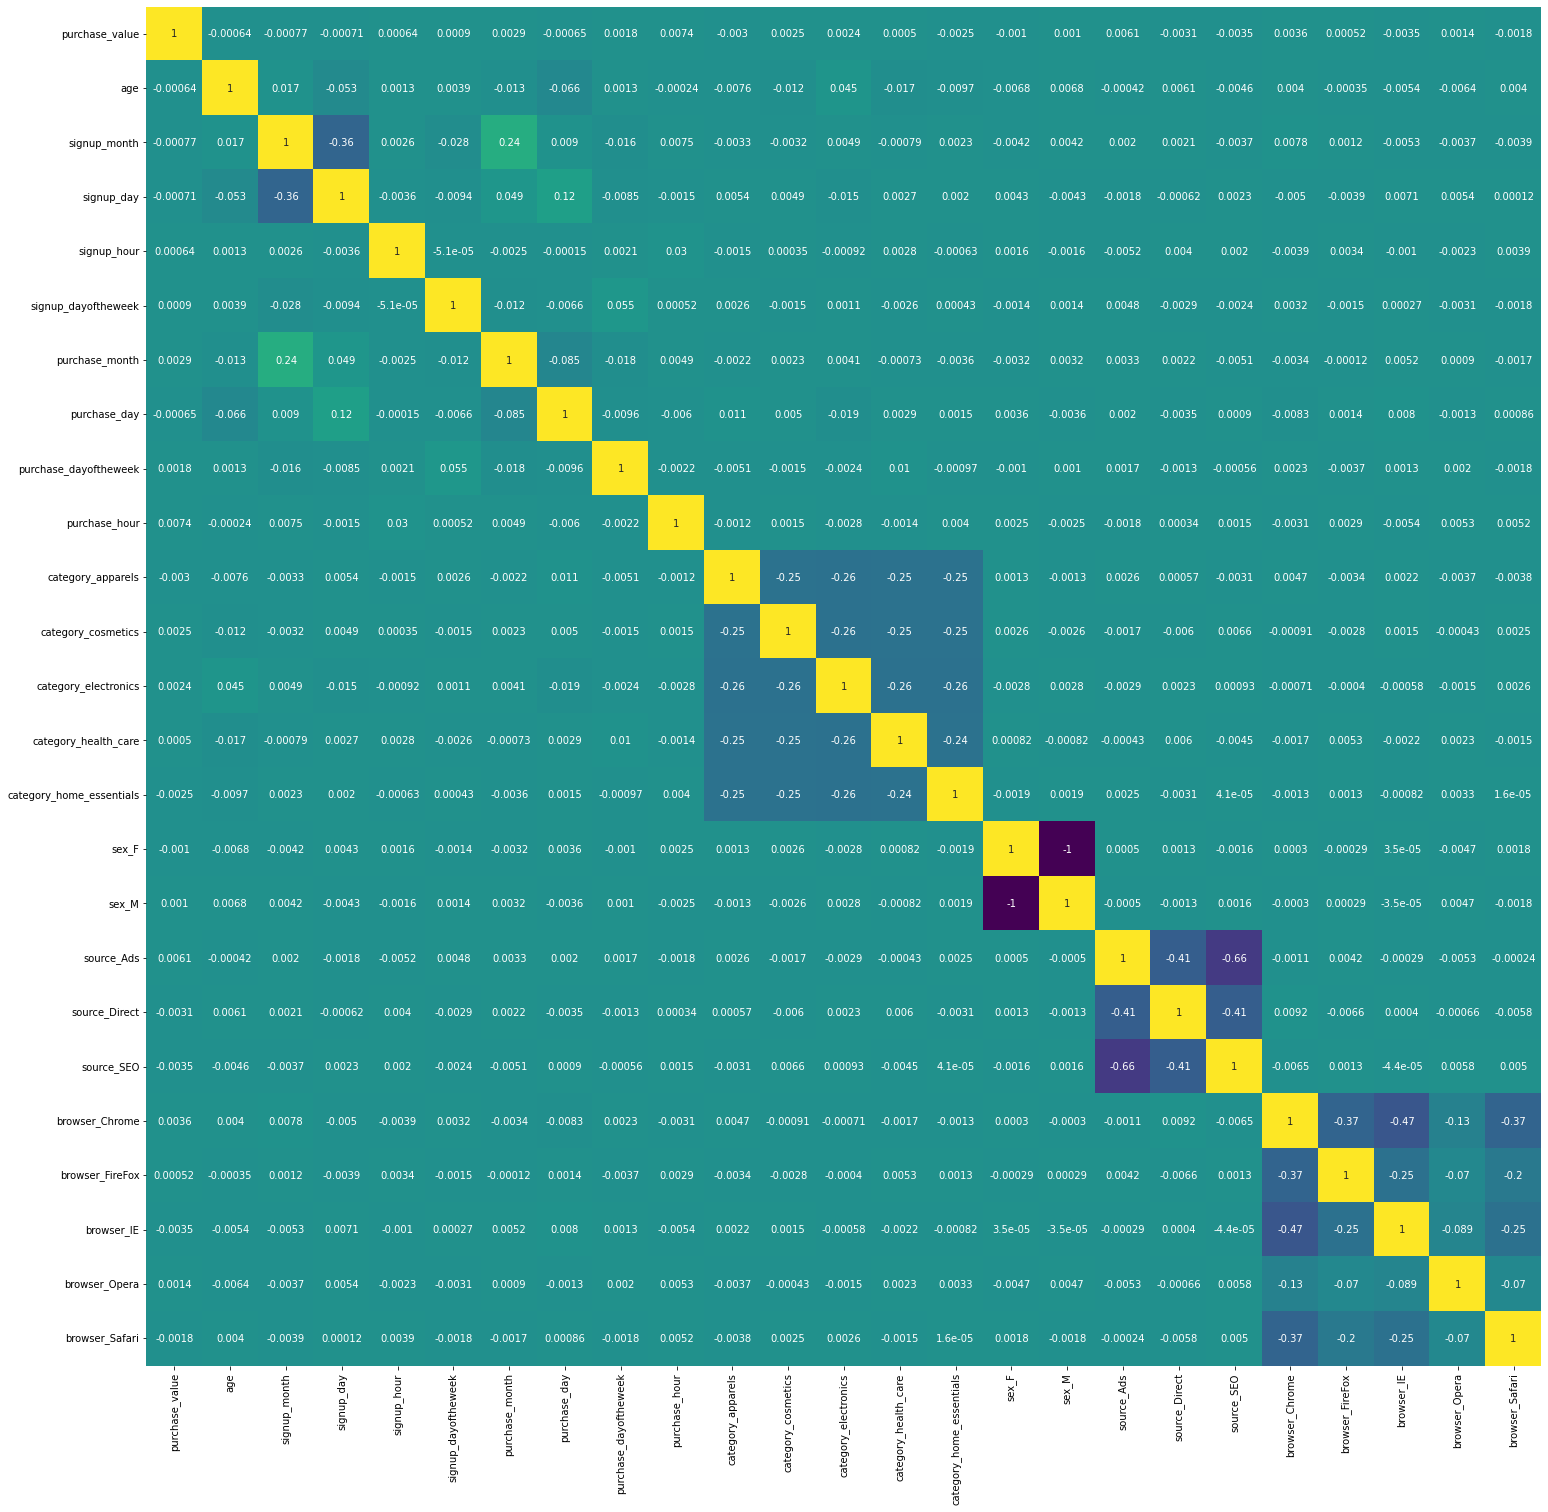

In [277]:
# to check the correlation between multiple features and the target col use the below technique:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.corr()

# using heatmap:
figure = plt.figure(figsize=[25,25])
sns.heatmap(data=numeric_features.corr(), annot=True, cmap='viridis',cbar=False) #, cbar=False

In [95]:
min(df.purchase_value),max(df.purchase_value)

(1016, 100092)

- This shows that the <b>purchase_value</b> should be normalized, which will be a good practice and improve the accuracy of the model.

In [96]:
sc=StandardScaler()

In [97]:
amount = df.purchase_value.values
amount

array([65278, 96399, 57296, ..., 19003, 68296, 23622], dtype=int64)

In [98]:
df['purchase_value'] = sc.fit_transform(amount.reshape(-1, 1))

In [99]:
df.head()

,purchase_value,class,purchase_year,dob_year,age,signup_month,signup_day,signup_hour,signup_dayoftheweek,purchase_month,...,sex_F,sex_M,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,0.517819,0,2015,1976,39,2,24,22,1,4,...,0,1,0,0,1,1,0,0,0,0
1,1.608423,0,2015,1962,53,7,6,20,0,8,...,1,0,1,0,0,1,0,0,0,0
2,0.238097,1,2015,1962,53,1,1,18,3,1,...,0,1,0,0,1,0,0,0,1,0
3,-0.240113,0,2015,1974,41,4,28,21,1,4,...,0,1,0,0,1,0,0,0,0,1
4,-0.192243,0,2015,1970,45,7,21,7,1,9,...,0,1,1,0,0,0,0,0,0,1


In [100]:
# After scaling the purchase_value:
min(df.purchase_value),max(df.purchase_value)

(-1.7341782595963242, 1.737840025876174)

In [101]:
age = df.age.values
age

array([39, 53, 53, ..., 26, 37, 38], dtype=int64)

In [102]:
df['age'] = sc.fit_transform(age.reshape(-1, 1))

In [103]:
# Scaling of the selected numerical columns for ML implementation:

signup_month = df.signup_month.values
signup_day = df.signup_day.values
signup_hour = df.signup_hour.values
signup_dayoftheweek = df.signup_dayoftheweek.values
purchase_month=df.purchase_month.values
purchase_day=df.purchase_day.values
purchase_dayoftheweek=df.purchase_dayoftheweek.values
purchase_hour=df.purchase_hour.values


df['signup_month'] = sc.fit_transform(signup_month.reshape(-1, 1))
df['signup_day'] = sc.fit_transform(signup_day.reshape(-1, 1))
df['signup_hour'] = sc.fit_transform(signup_hour.reshape(-1, 1))
df['signup_dayoftheweek'] = sc.fit_transform(signup_dayoftheweek.reshape(-1, 1))
df['purchase_month'] = sc.fit_transform(purchase_month.reshape(-1, 1))
df['purchase_day'] = sc.fit_transform(purchase_day.reshape(-1, 1))
df['purchase_dayoftheweek'] = sc.fit_transform(purchase_dayoftheweek.reshape(-1, 1))
df['purchase_hour'] = sc.fit_transform(purchase_hour.reshape(-1, 1))


df.head()

,purchase_value,class,purchase_year,dob_year,age,signup_month,signup_day,signup_hour,signup_dayoftheweek,purchase_month,...,sex_F,sex_M,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,0.517819,0,2015,1976,0.534459,-1.064973,1.074493,1.519276,-1.012922,-0.772789,...,0,1,0,0,1,1,0,0,0,0
1,1.608423,0,2015,1962,1.993553,0.588236,-0.795899,1.230098,-1.511844,0.596715,...,1,0,1,0,0,1,0,0,0,0
2,0.238097,1,2015,1962,1.993553,-1.395615,-1.315453,0.940919,-0.015080,-1.799916,...,0,1,0,0,1,0,0,0,1,0
3,-0.240113,0,2015,1974,0.742901,-0.403690,1.490135,1.374687,-1.012922,-0.772789,...,0,1,0,0,1,0,0,0,0,1
4,-0.192243,0,2015,1970,1.159785,0.588236,0.762761,-0.649561,-1.012922,0.939090,...,0,1,1,0,0,0,0,0,0,1


## Fraud Analysis using different Machine Learning algorithms: 

### 1. Logistic Regression:

In [104]:
# creating dependent and independent feature sets
X = df.drop(labels='class',axis=1).copy()
y = df['class'].copy()

In [105]:
# Class imbalance:
y.value_counts(normalize=True)*100

0    90.636757
1     9.363243
Name: class, dtype: float64

In [106]:
# spilting the data set in training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 33, stratify=y)   # For 'stratify' value refer to this link - https://stackoverflow.com/questions/63851453/typeerror-singleton-array-arraytrue-cannot-be-considered-a-valid-collection/63851490

In [107]:
# Training the logistic regression model using training data:
logr = LogisticRegression()
logr.fit(X_train, y_train)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [108]:
# predicting the values from test set using the trained model:
y_pred = logr.predict(X_test)

In [109]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [110]:
# calculating the accuracy score for the model using test & predicted data:
accuracy_score(y_test, y_pred)

# The accuracy is extremely bad as compared to the cause/scenario of the business solution. Also, accuracy is not to be used here.

0.9297062844750366

In [111]:
# Here the F1-score to be used:
# Getting f1 score:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.4269792467332821

In [112]:
# understanding the prediction capabilities based on classes:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     38450
           1       0.90      0.28      0.43      3972

    accuracy                           0.93     42422
   macro avg       0.92      0.64      0.69     42422
weighted avg       0.93      0.93      0.91     42422



In [113]:
# confusion matrix for the model
confusion_matrix(y_test, y_pred)

# True Negative is:
# TN - 38274

# False Positive is:
# FP - 176

# Here False Negative is:     this needs to be reduced
# FN - 2880

# True Positive is:     - this needs to be increased
# TP - 1092

array([[38329,   121],
       [ 2861,  1111]], dtype=int64)

#### From the above Confusion Matrix, it can be seen that the False Negative(FN) count is high, which means the model predictions are not fine. Hence the model needs to be further fine tuned.

#### Also, the F1-Score is to be used here since the cost is high as per the model prediction where the False Negative count needs to be reduced.

### Hypertuning of the model:

In [114]:
prob=logr.predict_proba(X_test)
prob

array([[0.95774578, 0.04225422],
       [0.8165677 , 0.1834323 ],
       [0.71795997, 0.28204003],
       ...,
       [0.98451312, 0.01548688],
       [0.72998148, 0.27001852],
       [0.34119659, 0.65880341]])

In [115]:
pos_prob=prob[:,1]

In [116]:
# Determing thresholds:
fpr,tpr,threshold=roc_curve(y_test,pos_prob)

In [117]:
ftt=pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns=['Threshold','fpr','tpr'])

In [118]:
ftt.head(1150)

,Threshold,fpr,tpr
0,1.902717,0.000000,0.000000
1,0.902717,0.000000,0.000252
2,0.748532,0.000000,0.085096
3,0.748041,0.000026,0.085096
4,0.741042,0.000026,0.091641
...,...,...,...
1145,0.282348,0.035891,0.465005
1146,0.282323,0.035891,0.465257
1147,0.281667,0.036203,0.465257
1148,0.281564,0.036203,0.465509


In [119]:
new_pred=(pos_prob>0.355581).astype('int')

In [120]:
confusion_matrix(y_test, new_pred)

array([[37797,   653],
       [ 2505,  1467]], dtype=int64)

In [121]:
f1_score(y_test,new_pred)

0.48161523309258053

#### Note: After performing hypertuning techniques, it is found that the maximum F1_Score is obtained at a threshold of 0.35. Though the count of False Negative is high. Any threshold below or higher the mentioned, is not accurate. Thus, different classification model needs to be checked for higher accuracy.

### 2. Decision Tree Classifier:

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
# Finding the best hyperparameter to be used:

dct = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(dct, param_grid = params)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'entropy', 'max_depth': 10}


In [124]:
# Using DecisionTree model:
dectree = DecisionTreeClassifier(max_depth=8)   # here criterion is by default : gini
dectree_train = dectree.fit(X_train, y_train)
y_pred = dectree_train.predict(X_test)

In [125]:
print("Decision tree accuracy Score=",accuracy_score(y_test,y_pred)*100)

Decision tree accuracy Score= 96.23072933855074


In [126]:
# F1_Score for DecisionTree model:
f1_score(y_test,y_pred)

0.7600900225056263

#### Note: The F1_Score for the DecisionTreee Model is much better than for the Logistic Regression Model.

In [127]:
confusion_matrix(y_test,y_pred)

array([[38290,   160],
       [ 1439,  2533]], dtype=int64)

#### From the above Confusion Matrix, it is clear still the count for False Negative(FN) needs to be lowered. Hence, going to use hyperparameter tuning on the model.

#### Hypertuning of the model:

In [128]:
prob=dectree_train.predict_proba(X_test)
prob

array([[0.9675231 , 0.0324769 ],
       [0.00353357, 0.99646643],
       [0.9675231 , 0.0324769 ],
       ...,
       [0.98312711, 0.01687289],
       [0.99209212, 0.00790788],
       [0.01851852, 0.98148148]])

In [129]:
prob_positive = prob[:,1]

In [130]:
fpr,tpr,threshold=roc_curve(y_test,prob_positive)

In [131]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])

In [132]:
ftt.head(40)

,threshold,fpr,tpr
0,2.000000,0.000000,0.000000
1,1.000000,0.000442,0.283988
2,0.997333,0.000468,0.324270
3,0.997260,0.000572,0.358258
4,0.996466,0.000650,0.421450
5,0.981481,0.000884,0.469789
6,0.974359,0.001014,0.495972
7,0.973684,0.001014,0.497482
8,0.973404,0.001118,0.514854
9,0.971429,0.001144,0.526183


In [133]:
new_pred = (prob_positive>0.44900).astype("int")  # 0.448276 / 0.071429
new_pred

array([0, 1, 0, ..., 0, 0, 1])

In [134]:
confusion_matrix(y_test,new_pred)

array([[38276,   174],
       [ 1435,  2537]], dtype=int64)

In [135]:
f1_score(y_test,new_pred)

0.7592398623372736

In [136]:
print("Decision tree accuracy Score=",accuracy_score(y_test,new_pred)*100)

Decision tree accuracy Score= 96.2071566639951


#### Note: From the above tuning, it is found that the best F1_score is acheived on the default threshold value. So, the best accuracy reached is: 96%

### 3. Random Forest:

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
# Finding the best hyperparameter to be used:
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(1,20))} 
cv_model = GridSearchCV(estimator=rfc, cv=5, param_grid=params, return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'n_estimators': 16}


In [140]:
# Creating instance of the algorithm:
rfc=RandomForestClassifier(n_estimators=15,max_depth=25,random_state=3)

In [141]:
# Training the model:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=15, random_state=3)

In [142]:
y_pred=rfc.predict(X_test)

In [143]:
print("Accuracy Score=",accuracy_score(y_test,y_pred)*100)

Accuracy Score= 96.32502003677337


In [144]:
f1_score(y_test,y_pred)

0.7637520836490378

In [145]:
# Confusion Matrix:
confusion_matrix(y_test,y_pred)

array([[38343,   107],
       [ 1452,  2520]], dtype=int64)

#### Hypertuning of the model:

In [146]:
prob=rfc.predict_proba(X_test)
prob

array([[0.99547775, 0.00452225],
       [0.        , 1.        ],
       [0.99867987, 0.00132013],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [147]:
prob_pos=prob[:,1]
prob_pos

array([0.00452225, 1.        , 0.00132013, ..., 0.        , 0.        ,
       1.        ])

In [148]:
fpr,tpr,threshold=roc_curve(y_test,prob_pos)

In [149]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])

In [150]:
ftt.head(40)

,threshold,fpr,tpr
0,2.000000,0.000000,0.000000
1,1.000000,0.000104,0.435045
2,0.933333,0.000156,0.531219
3,0.866667,0.000234,0.569990
4,0.800000,0.000416,0.590634
5,0.733333,0.000858,0.604481
6,0.666667,0.001300,0.615559
7,0.600000,0.001977,0.624119
8,0.534737,0.001977,0.624371
9,0.533333,0.002783,0.634441


In [151]:
new_pred = (prob_pos>0.526316).astype("int")  
new_pred

array([0, 1, 0, ..., 0, 0, 1])

In [152]:
confusion_matrix(y_test,new_pred)

array([[38343,   107],
       [ 1452,  2520]], dtype=int64)

In [153]:
print("Random Forest accuracy Score=",accuracy_score(y_test,new_pred)*100)

Random Forest accuracy Score= 96.32502003677337


In [154]:
f1_score(y_test,new_pred)

0.7637520836490378

In [155]:
# Finding the best hyperparameter to be used:
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(1,11))} 
cv_model = GridSearchCV(estimator=rfc, cv=5, param_grid=params, return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'n_estimators': 10}


In [156]:
rfc=RandomForestClassifier(n_estimators=9,min_samples_split=5)   # not used max_depth

In [157]:
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=9)

In [158]:
y_pred=rfc.predict(X_test)

In [159]:
print("Accuracy Score=",accuracy_score(y_test,y_pred)*100)

Accuracy Score= 96.2283720710952


In [160]:
f1_score(y_test,y_pred)

0.7579425113464449

In [161]:
confusion_matrix(y_test,y_pred)

array([[38317,   133],
       [ 1467,  2505]], dtype=int64)

### 4. KNN:

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn = KNeighborsClassifier(n_neighbors=3) 

In [164]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [165]:
y_pred = knn.predict(X_test)

In [166]:
print("Accuracy Score=",accuracy_score(y_test,y_pred)*100)

Accuracy Score= 94.80458252793362


In [167]:
f1_score(y_test,y_pred)

0.6993998908892526

- <b>Note</b>: Hyperparameter tuning of KNN model is taking extreme longer time than usual. So, cannot proceed further.

### 5.SVM:

In [169]:
from sklearn.svm import SVC
clf = SVC()

In [170]:
clf.fit(X_train, y_train) 

SVC()

In [171]:
y_pred = clf.predict(X_test)

In [172]:
accuracy = clf.score(X_test, y_test) 
accuracy

0.906369336664938

In [173]:
print("Accuracy Score=",accuracy_score(y_test,y_pred)*100)

Accuracy Score= 90.6369336664938


In [174]:
f1_score(y_test,y_pred)

0.0

### 6. Naive Bayes:

In [175]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [176]:
print("Accuracy Score=",accuracy_score(y_test,y_pred)*100)

Accuracy Score= 90.71236622507189


In [177]:
f1_score(y_test,y_pred)

0.05741626794258374

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38450
           1       0.58      0.03      0.06      3972

    accuracy                           0.91     42422
   macro avg       0.74      0.51      0.50     42422
weighted avg       0.88      0.91      0.87     42422



In [179]:
confusion_matrix(y_test,y_pred)

array([[38362,    88],
       [ 3852,   120]], dtype=int64)

### 6. XGBoost:

In [180]:
# !pip install xgboost

In [181]:
xgb = XGBClassifier(max_depth = 11)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [182]:
print("Accuracy Score=",accuracy_score(y_test,xgb_pred)*100)

Accuracy Score= 96.6786101551082


In [183]:
f1_score(y_test,xgb_pred)

0.790046192817762

In [184]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38450
           1       0.97      0.67      0.79      3972

    accuracy                           0.97     42422
   macro avg       0.97      0.83      0.89     42422
weighted avg       0.97      0.97      0.96     42422



In [185]:
confusion_matrix(y_test,xgb_pred)

array([[38362,    88],
       [ 1321,  2651]], dtype=int64)

#### Hypertuning the model:

#### Using SMOTE:

In [186]:
# Installing imb-learn module required for SMOTE module:

# !pip install imbalanced-learn

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
y.value_counts()

0    128164
1     13240
Name: class, dtype: int64

In [189]:
# Creating SMOTE instance:
smote = SMOTE(sampling_strategy='minority')

In [190]:
# creating new samples from smote instance:
X_s, y_s = smote.fit_resample(X,y)          # fit_resample (not fit_sample() if SMOTE is imported as per the above syntax)

In [191]:
y_s.value_counts()

1    128164
0    128164
Name: class, dtype: int64

- Here, we can see that the resmapling has helped to create sythetic sample for the minority class. The imbalance is managed.

In [192]:
# spilting the data set in training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X_s,y_s,test_size = 0.3,random_state = 15,stratify=y_s)   # For 'stratify' value refer to this link - https://stackoverflow.com/questions/63851453/typeerror-singleton-array-arraytrue-cannot-be-considered-a-valid-collection/63851490

In [193]:
y_train.value_counts()

1    89715
0    89714
Name: class, dtype: int64

In [194]:
y_test.value_counts()

0    38450
1    38449
Name: class, dtype: int64

In [195]:
xgb = XGBClassifier(max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [196]:
print("Accuracy Score=",accuracy_score(y_test,xgb_pred)*100)

Accuracy Score= 98.02598213240744


In [197]:
f1_score(y_test,xgb_pred)

0.9799174472138434

In [198]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     38450
           1       1.00      0.96      0.98     38449

    accuracy                           0.98     76899
   macro avg       0.98      0.98      0.98     76899
weighted avg       0.98      0.98      0.98     76899



In [199]:
confusion_matrix(y_test,xgb_pred)

array([[38346,   104],
       [ 1414, 37035]], dtype=int64)

In [200]:
# Determining the hyperparameter:

params = {'max_depth':list(range(1,11))}   # 'max_depth' it can be taken any range.
cv_model = GridSearchCV(estimator=xgb,cv=5,param_grid = params,return_train_score=True)
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:29:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 10}


In [201]:
xgb = XGBClassifier(max_depth = 10)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[10:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [202]:
print("Accuracy Score=",accuracy_score(y_test,xgb_pred)*100)

Accuracy Score= 98.11050858918841


In [203]:
f1_score(y_test,xgb_pred)

0.9807979489619263

In [204]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38450
           1       1.00      0.97      0.98     38449

    accuracy                           0.98     76899
   macro avg       0.98      0.98      0.98     76899
weighted avg       0.98      0.98      0.98     76899



In [205]:
xgb = XGBClassifier(max_depth = 21)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [206]:
print("Accuracy Score=",accuracy_score(y_test,xgb_pred)*100)

Accuracy Score= 98.10530696107882


In [207]:
f1_score(y_test,xgb_pred)

0.9807527180015589

In [208]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38450
           1       1.00      0.97      0.98     38449

    accuracy                           0.98     76899
   macro avg       0.98      0.98      0.98     76899
weighted avg       0.98      0.98      0.98     76899



In [209]:
confusion_matrix(y_test,xgb_pred)

array([[38321,   129],
       [ 1328, 37121]], dtype=int64)

In [210]:
xgb = XGBClassifier(max_depth = 31)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [211]:
print("Accuracy Score=",accuracy_score(y_test,xgb_pred)*100)

Accuracy Score= 98.12871428757201


In [212]:
f1_score(y_test,xgb_pred)

0.9809864830939578

In [213]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38450
           1       1.00      0.97      0.98     38449

    accuracy                           0.98     76899
   macro avg       0.98      0.98      0.98     76899
weighted avg       0.98      0.98      0.98     76899



In [214]:
confusion_matrix(y_test,xgb_pred)

array([[38338,   112],
       [ 1327, 37122]], dtype=int64)

#### Hypertuning using Threshold:

In [215]:
prob=xgb.predict_proba(X_test)
prob

array([[9.9972707e-01, 2.7294326e-04],
       [1.2934208e-04, 9.9987066e-01],
       [7.8678131e-06, 9.9999213e-01],
       ...,
       [9.9970871e-01, 2.9129366e-04],
       [1.6689301e-06, 9.9999833e-01],
       [2.6226044e-05, 9.9997377e-01]], dtype=float32)

In [216]:
prob_pos=prob[:,1]
prob_pos

array([2.7294326e-04, 9.9987066e-01, 9.9999213e-01, ..., 2.9129366e-04,
       9.9999833e-01, 9.9997377e-01], dtype=float32)

In [217]:
fpr,tpr,threshold=roc_curve(y_test,prob_pos)

In [218]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])

In [219]:
ftt[2204:2212]

,threshold,fpr,tpr
2204,0.999503,0.000026,0.876694
2205,0.999503,0.000026,0.876720
2206,0.999503,0.000026,0.876772
2207,0.999502,0.000026,0.876850
2208,0.999501,0.000026,0.876954
2209,0.999501,0.000026,0.876980
2210,0.999501,0.000026,0.877032
2211,0.999500,0.000026,0.877084


In [220]:
new_pred = (prob_pos>0.235233).astype("int")  
new_pred

array([0, 1, 1, ..., 0, 1, 1])

In [221]:
confusion_matrix(y_test,new_pred)

array([[38242,   208],
       [ 1274, 37175]], dtype=int64)

In [222]:
print("Accuracy Score=",accuracy_score(y_test,new_pred)*100)

Accuracy Score= 98.07279678539382


In [223]:
f1_score(y_test,new_pred)

0.9804567992404262

In [224]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     38450
           1       0.99      0.97      0.98     38449

    accuracy                           0.98     76899
   macro avg       0.98      0.98      0.98     76899
weighted avg       0.98      0.98      0.98     76899



In [225]:
xgb = XGBClassifier(max_depth = 51)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

C:\Users\HP\AnacondaJupyter\Anaconda_New\envs\TF1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [226]:
print("Accuracy Score=",accuracy_score(y_test,xgb_pred)*100)

Accuracy Score= 98.11831103135282


In [227]:
f1_score(y_test,xgb_pred)

0.9808812842703309

In [228]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38450
           1       1.00      0.97      0.98     38449

    accuracy                           0.98     76899
   macro avg       0.98      0.98      0.98     76899
weighted avg       0.98      0.98      0.98     76899



In [229]:
confusion_matrix(y_test,xgb_pred)

array([[38333,   117],
       [ 1330, 37119]], dtype=int64)

## Customer Segmentation (Using Clustering Algorithm):

In [230]:
# Since, clustering is a unsupervised technique, the class col needs to be dropped:
df.drop(labels='class',axis=1,inplace=True)

In [231]:
df.drop(labels='purchase_year',axis=1,inplace=True)

In [232]:
df.drop(labels='dob_year',axis=1,inplace=True)

In [233]:
df.head()

,purchase_value,age,signup_month,signup_day,signup_hour,signup_dayoftheweek,purchase_month,purchase_day,purchase_dayoftheweek,purchase_hour,...,sex_F,sex_M,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,0.517819,0.534459,-1.064973,1.074493,1.519276,-1.012922,-0.772789,0.333442,0.996567,-1.375180,...,0,1,0,0,1,1,0,0,0,0
1,1.608423,1.993553,0.588236,-0.795899,1.230098,-1.511844,0.596715,-1.000223,-0.000021,-1.519753,...,1,0,1,0,0,1,0,0,0,0
2,0.238097,1.993553,-1.395615,-1.315453,0.940919,-0.015080,-1.799916,-1.555916,-0.000021,0.937992,...,0,1,0,0,1,0,0,0,1,0
3,-0.240113,0.742901,-0.403690,1.490135,1.374687,-1.012922,-0.772789,-1.111362,1.494860,0.215126,...,0,1,0,0,1,0,0,0,0,1
4,-0.192243,1.159785,0.588236,0.762761,-0.649561,-1.012922,0.939090,-0.666807,-0.498315,0.937992,...,0,1,1,0,0,0,0,0,0,1


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141404 entries, 0 to 151111
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   purchase_value            141404 non-null  float64
 1   age                       141404 non-null  float64
 2   signup_month              141404 non-null  float64
 3   signup_day                141404 non-null  float64
 4   signup_hour               141404 non-null  float64
 5   signup_dayoftheweek       141404 non-null  float64
 6   purchase_month            141404 non-null  float64
 7   purchase_day              141404 non-null  float64
 8   purchase_dayoftheweek     141404 non-null  float64
 9   purchase_hour             141404 non-null  float64
 10  category_apparels         141404 non-null  uint8  
 11  category_cosmetics        141404 non-null  uint8  
 12  category_electronics      141404 non-null  uint8  
 13  category_health_care      141404 non-null  u

In [235]:
data_num=df[['purchase_value','age','signup_month','signup_hour']]

In [236]:
data_num.dtypes

purchase_value    float64
age               float64
signup_month      float64
signup_hour       float64
dtype: object

In [237]:
data_num.head()

,purchase_value,age,signup_month,signup_hour
0,0.517819,0.534459,-1.064973,1.519276
1,1.608423,1.993553,0.588236,1.230098
2,0.238097,1.993553,-1.395615,0.940919
3,-0.240113,0.742901,-0.403690,1.374687
4,-0.192243,1.159785,0.588236,-0.649561


### Applying ML Algorithm for clustering : KNN method: 

In [238]:
from sklearn.cluster import KMeans

In [239]:
kmeans=KMeans(n_clusters=3,init="k-means++")   # creating instance of the model. Using a random number of cluster
kmeans.fit(data_num)   # Training of the model.

KMeans(n_clusters=3)

In [240]:
kmeans.labels_

array([2, 1, 2, ..., 2, 1, 1])

In [241]:
kmeans.cluster_centers_   # coordinates of the 3 centroids created:

array([[-0.00187312, -0.080101  , -0.45636836, -0.91963515],
       [-0.00178033,  0.24351314,  1.28465358,  0.00178928],
       [ 0.00312405, -0.09190712, -0.45115155,  0.91589439]])

In [242]:
# Forming the graph 'wss' vs 'number of clusters' and from the Elbow method will find the ideal K value: 
K=range(1,20)
wss = []
for i in K:
    kmeans = KMeans(n_clusters=i,init="k-means++")     # looping for each cluster.
    kmeans.fit(data_num)
    wss.append(kmeans.inertia_)    # this parameter 'inertia_' gives the WSS value.

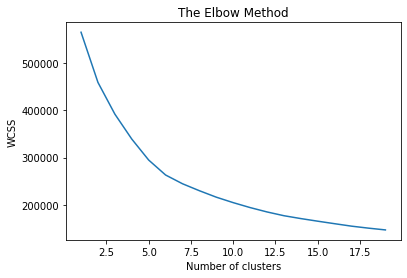

In [269]:
plt.plot(K,wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above graph it is inferred that that the ideal value of k is 5. 

In [244]:
kmeans=KMeans(n_clusters=5,init="k-means++")  
kmeans.fit(data_num)  

KMeans(n_clusters=5)

In [245]:
kmeans.labels_

array([3, 1, 1, ..., 3, 4, 4])

In [246]:
df_master.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,class,category,purchase_year,dob_year,age,signup_month,signup_day,signup_hour,signup_dayoftheweek,purchase_month,purchase_day,purchase_dayoftheweek,purchase_hour
0,2015-02-24 22:55:00,2015-04-18 02:47:00,65278,SEO,Chrome,M,0,home_essentials,2015,1976,39,2,24,22,1,4,18,5,2
1,2015-07-06 20:39:00,2015-08-06 01:38:00,96399,Ads,Chrome,F,0,apparels,2015,1962,53,7,6,20,0,8,6,3,1
2,2015-01-01 18:52:00,2015-01-01 18:52:00,57296,SEO,Opera,M,1,electronics,2015,1962,53,1,1,18,3,1,1,3,18
3,2015-04-28 21:13:00,2015-04-05 13:54:00,43650,SEO,Safari,M,0,health_care,2015,1974,41,4,28,21,1,4,5,6,13
4,2015-07-21 07:09:00,2015-09-09 18:40:00,45016,Ads,Safari,M,0,home_essentials,2015,1970,45,7,21,7,1,9,9,2,18


In [247]:
df_master['signup_day_char'] = pd.to_datetime(df_master['signup_time']).dt.day_name()
df_master['purchase_day_char'] = pd.to_datetime(df_master['purchase_time']).dt.day_name()
df_master['purchase_month'] = pd.to_datetime(df_master['purchase_time']).dt.month_name()
df_master['signup_month'] = pd.to_datetime(df_master['signup_time']).dt.month_name()

In [248]:
df_master.drop(labels=['purchase_time','signup_time','purchase_day','signup_day','dob_year','purchase_year'],axis=1,inplace=True)

In [249]:
df_master.head()

,purchase_value,source,browser,sex,class,category,age,signup_month,signup_hour,signup_dayoftheweek,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char
0,65278,SEO,Chrome,M,0,home_essentials,39,February,22,1,April,5,2,Tuesday,Saturday
1,96399,Ads,Chrome,F,0,apparels,53,July,20,0,August,3,1,Monday,Thursday
2,57296,SEO,Opera,M,1,electronics,53,January,18,3,January,3,18,Thursday,Thursday
3,43650,SEO,Safari,M,0,health_care,41,April,21,1,April,6,13,Tuesday,Sunday
4,45016,Ads,Safari,M,0,home_essentials,45,July,7,1,September,2,18,Tuesday,Wednesday


In [250]:
df_master['Label']=kmeans.labels_

Text(0.5, 1.0, 'Segment wise Source Distribution')

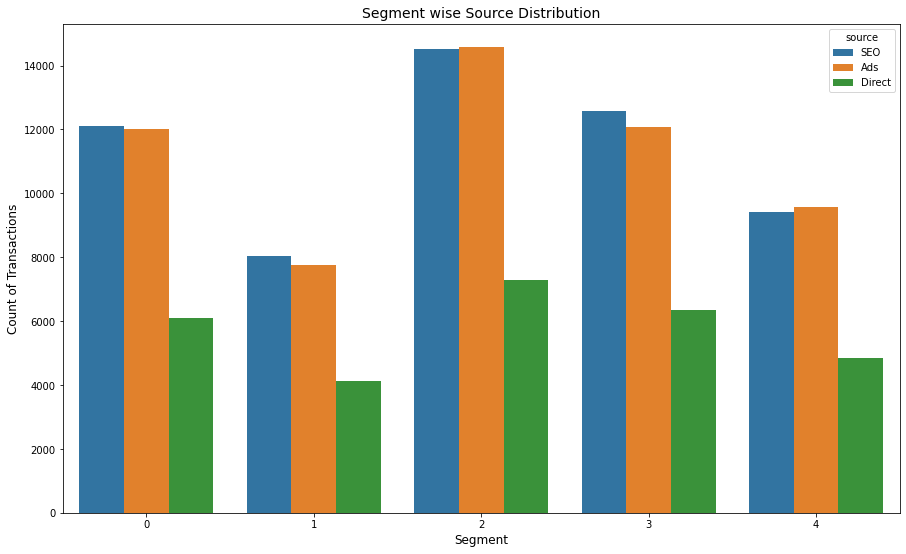

In [270]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='source',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of Transactions',fontsize=12)
plt.title('Segment wise Source Distribution',fontsize=14)

Text(0.5, 1.0, 'Segment wise Gender Distribution')

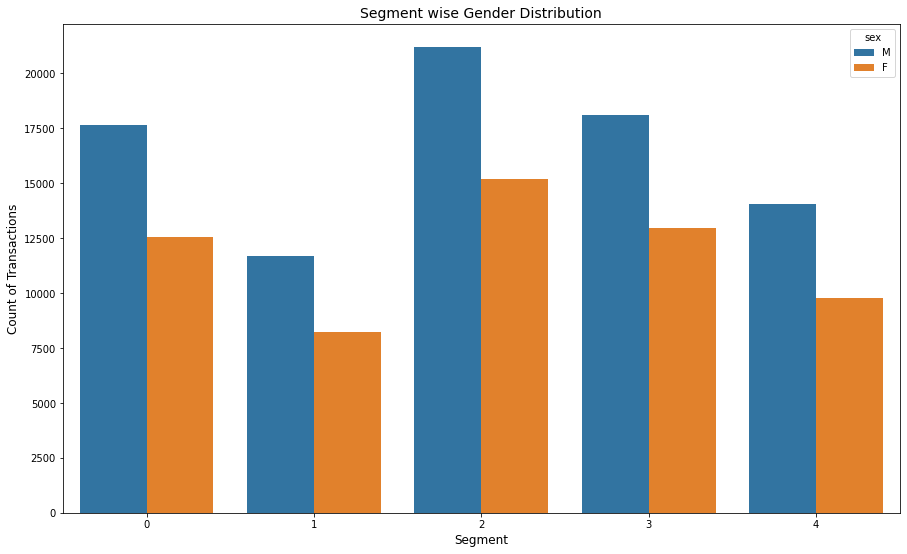

In [271]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='sex',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of Transactions',fontsize=12)
plt.title('Segment wise Gender Distribution',fontsize=14)

In [253]:
# Creating age bin:
def label_race (row):
   if row['age'] >=0 and row['age'] <=19:
      return '0-19'
   if row['age'] >=20 and row['age'] <=39 :
      return '20-39'
   if row['age'] >=40 and row['age'] <=59 :
      return '40-59'
   if row['age'] >= 60:
      return '60 & above'
        
# Applying the function to build a new col:
df_master['age_bin'] = df_master.apply (lambda row: label_race(row), axis=1)

df_master.head()

,purchase_value,source,browser,sex,class,category,age,signup_month,signup_hour,signup_dayoftheweek,purchase_month,purchase_dayoftheweek,purchase_hour,signup_day_char,purchase_day_char,Label,age_bin
0,65278,SEO,Chrome,M,0,home_essentials,39,February,22,1,April,5,2,Tuesday,Saturday,3,20-39
1,96399,Ads,Chrome,F,0,apparels,53,July,20,0,August,3,1,Monday,Thursday,1,40-59
2,57296,SEO,Opera,M,1,electronics,53,January,18,3,January,3,18,Thursday,Thursday,1,40-59
3,43650,SEO,Safari,M,0,health_care,41,April,21,1,April,6,13,Tuesday,Sunday,3,40-59
4,45016,Ads,Safari,M,0,home_essentials,45,July,7,1,September,2,18,Tuesday,Wednesday,1,40-59


Text(0.5, 1.0, 'Segment wise Age Distribution')

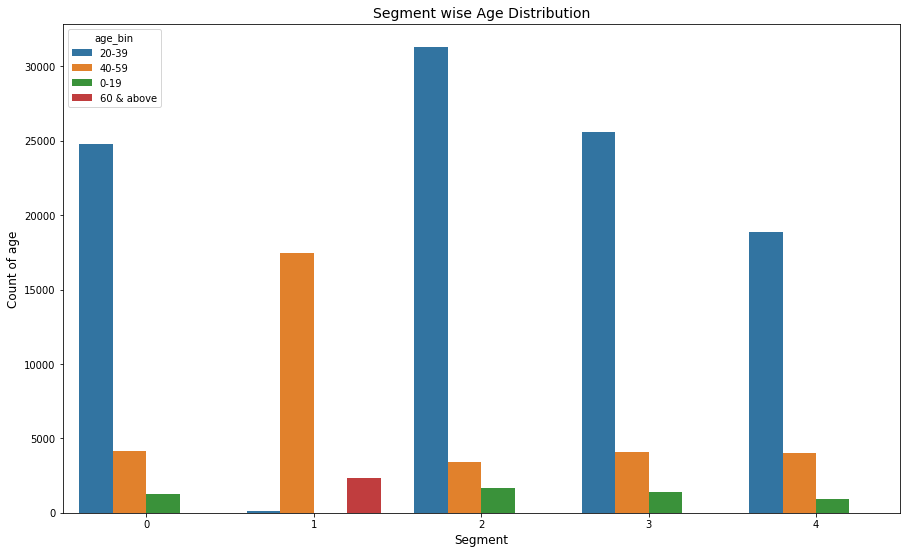

In [272]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='age_bin',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of age',fontsize=12)
plt.title('Segment wise Age Distribution',fontsize=14)

Text(0.5, 1.0, 'Segment wise Category Distribution')

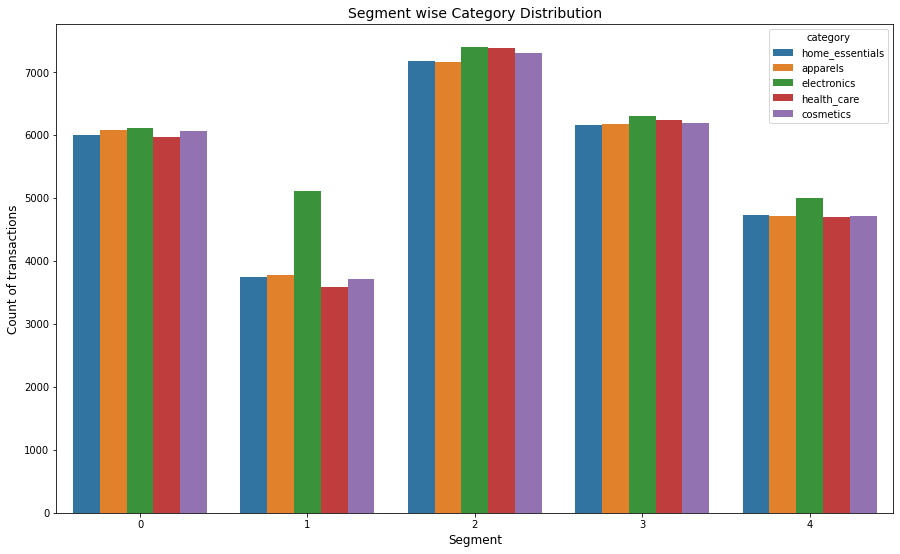

In [273]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='category',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of transactions',fontsize=12)
plt.title('Segment wise Category Distribution',fontsize=14)

Text(0.5, 1.0, 'Segment wise Browser Distribution')

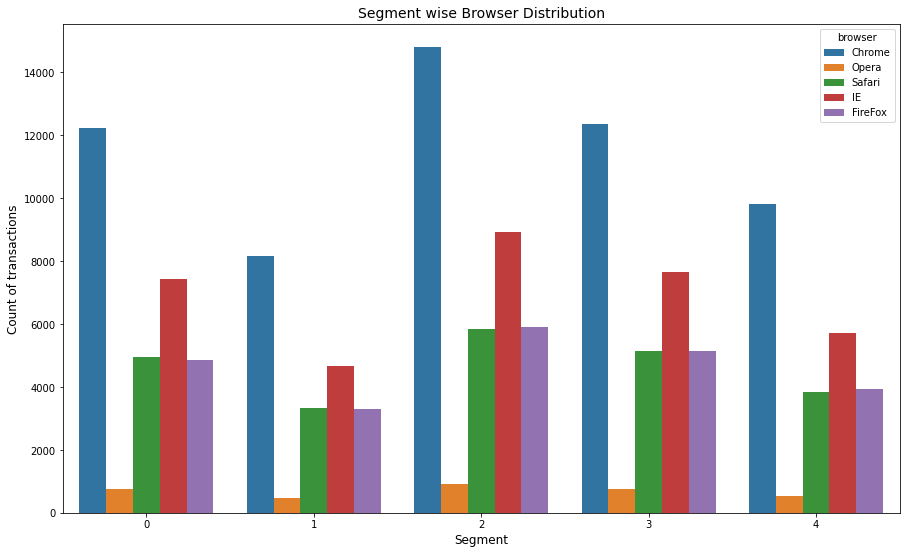

In [274]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='browser',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of transactions',fontsize=12)
plt.title('Segment wise Browser Distribution',fontsize=14)

Text(0.5, 1.0, 'Segment wise Class Distribution')

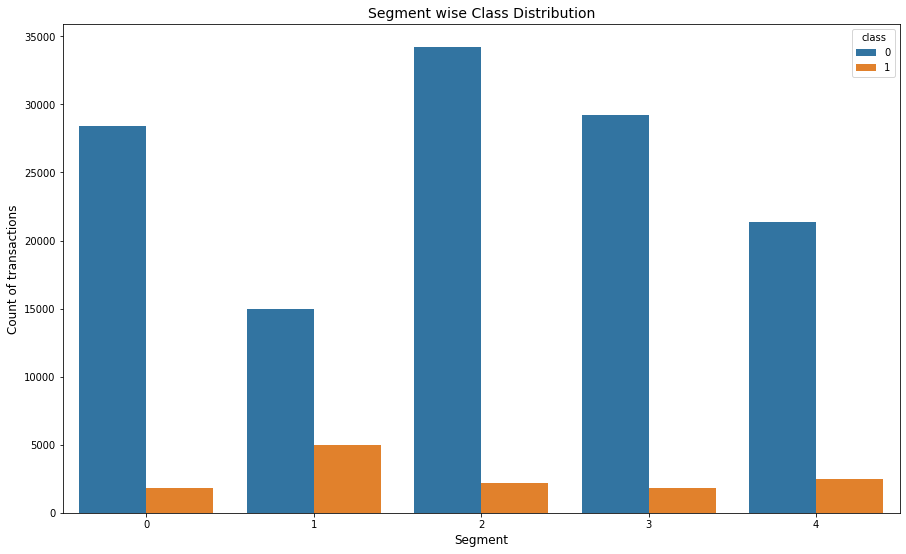

In [275]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='class',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of transactions',fontsize=12)
plt.title('Segment wise Class Distribution',fontsize=14)

Text(0.5, 1.0, 'Segment wise Purchase Day Distribution')

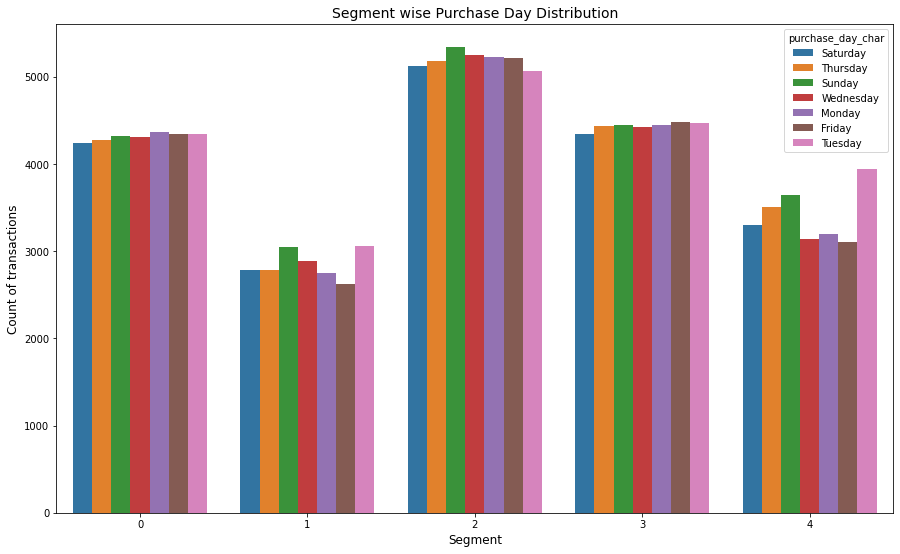

In [276]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x="Label",hue='purchase_day_char',data=df_master)
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Count of transactions',fontsize=12)
plt.title('Segment wise Purchase Day Distribution',fontsize=14)

# <center> * End of notebook * </center>